# Perceptron

## モデル

In [1]:
import numpy as np

class Perceptron:
    """パーセプトロン分類器

    パラメータ
    ----------
    eta : float
        学習率（0.0より大きく1.0以下の値）
    n_iter : int
        訓練データの訓練回数
    random_state : int
        重みを初期化するための乱数シード

    属性
    ----------
    w_ : 1次元配列
        適合後の重み
    b_ : スカラー
        適合後のバイアスユニット
    errors_ : リスト
        各エポックでの誤分類（更新）の数
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """訓練データに適合させる

        パラメータ
        ----------
        X : {配列のようなデータ構造}, shape = [n_examples, n_features]
            訓練ベクトル。n_examplesは訓練データの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_examples]
            目的変数

        戻り値
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):  # 訓練データを繰り返し処理
            errors = 0
            for xi, target in zip(X, y):  # 重みとバイアスユニットを更新
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)  # 誤差を追加
            self.errors_.append(errors)
        return self # インスタンス自身を返す

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## データ読み込み

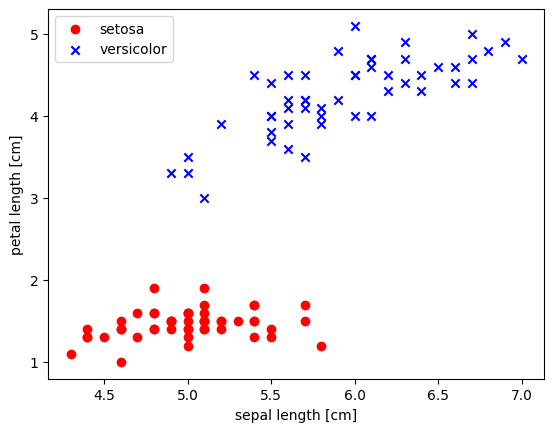

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 学習

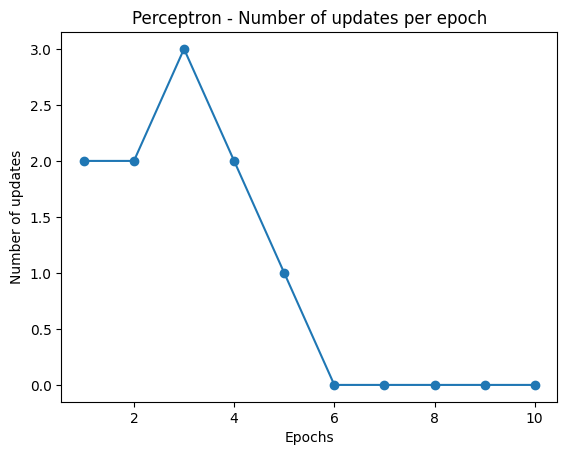

In [3]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Number of updates per epoch')
plt.show()

## 図示

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')


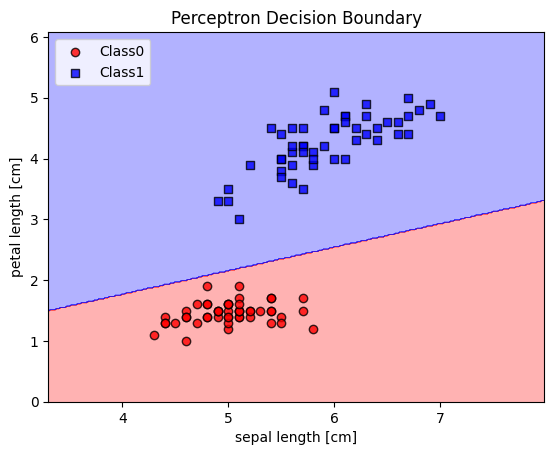

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron Decision Boundary')
plt.legend(loc='upper left')
plt.show()

関連：  
ADALINE(ADAptive LInear NEuron)  
フルバッチ勾配降下法↔︎確率的勾配降下法(逐次的勾配降下法、オンライン勾配降下法)  
→中間：ミニバッチ勾配降下法